In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

From equation (10), we know that $g_1(s)\beta(a-c)^2-1=0$. Let $A=(a-c)^2$, we have $g_1(s)=\frac{1}{A\beta}$. And combine with equation (11), we will get $$ \frac{s(2-s-s\theta)(8(1+\theta)+s(s(1+\theta)(2-(2-s)\theta)-4(2+\theta)))}{(4-(1+\theta)s^2)^3}-\frac{1}{A\beta}=0 $$ Solve this equation, we will the the optimal s.

Since $s^*=e^{-\beta K^*}$, we get $K^*=k_1^*=k=\frac{-\log(s)}{\beta}$.

And $\beta$ should satisfy: $$ \beta>\frac{(3-\theta)^3}{A(1-\theta)(2+5\theta-\theta^2)}, $$ that is, $$ \beta A>\frac{(3-\theta)^3}{(1-\theta)(2+5\theta-\theta^2)}. $$ When $\theta=0$, the right hand side function gets its maximum 13.5, so $\beta A>13.5$

Then from equation (13) and (14), we get $$ \begin{array}{lll}
& & CS & = & \displaystyle \frac{A(8-4\theta s-(6+2\theta-\theta^2)s^2+2(1+\theta)s^3)}{2(4-(1+\theta)s^2)^2} \\
\pi_1+\pi_2 & = & PS & = & \displaystyle \frac{A(8-8s+(2-2\theta-\theta^2)s^2+(\theta+\theta^2)s^3)}{(4-(1+\theta)s^2)^2}-k. \\
\end{array} $$ Thus the total welfare will be: $$ SW=CS+PS= \frac{A(24-4(4+\theta)s-(2+6\theta+\theta^2)s^2+2(1+\theta)^2 s^3)}{2(4-(1+\theta)s^2)^2}-k $$

In [2]:
def surplus_u(β=5, A=3, θ_range=np.arange(0,0.5,0.001)):
    def f(s,θ): # solve this equation to get s
        return (s*(2-s-s*θ)*(8*(1+θ)+s*(s*(1+θ)*(2+(s-2)*θ)-4*(2+θ))))/((4-(1+θ)*s**2)**3)-1/(A*β)
   
    s = np.array([fsolve(f,0,args=θ)[0] for θ in θ_range])
    k = -np.log(s)/β
    CS=A*(8-(4*θ_range)*s-(6+2*θ_range-θ_range**2)*s**2+2*(1+θ_range)*s**3)/(2*(4-(1+θ_range)*s**2)**2)
    PS=A*(8-8*s+(2-2*θ_range-θ_range**2)*s**2+(θ_range+θ_range**2)*s**3)/((4-(1+θ_range)*s**2)**2)-k
    SW=CS+PS
    #SW=A*(24-4*(4+θ_range)*s-(2+6+θ_range+θ_range**2)*s**2+2*(1+θ_range)**2*s**3)/(2*(4-(1+θ_range)*s**2)**2)-k

    return CS,PS,SW

def plot_surplus(β=5, A=3, θ_range=np.arange(0,0.5,0.001),surplus_func=surplus_u):
    CS, PS, SW = surplus_func(β, A, θ_range)
    fig, ax = plt.subplots(3, figsize=(6,9), sharex = True)
    ax[0].plot(θ_range, CS)
    ax[0].set_ylabel('CS')
    ax[0].set_title(f'$\\beta={{{β}}}, A={{{A}}}$')
    ax[1].plot(θ_range, PS)
    ax[1].set_ylabel('PS')
    ax[2].plot(θ_range, SW)
    ax[2].set_ylabel('SW')
    ax[2].set_xlabel('$θ$')
    fig.tight_layout()
    return fig, ax

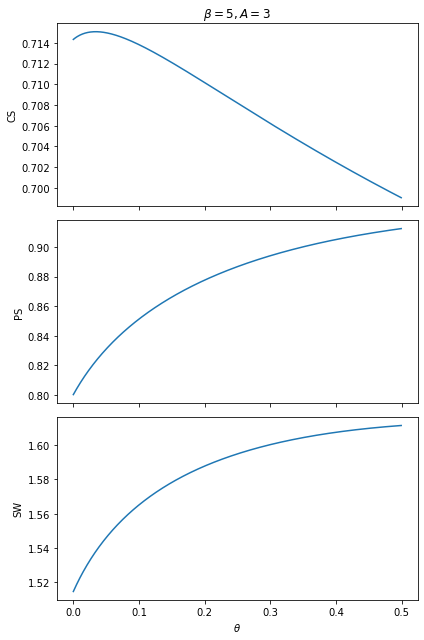

In [3]:
plot_surplus(β=5, A=3, θ_range=np.arange(0,0.5,0.001));

In [4]:
res=pd.DataFrame(columns=['β','(a-c)^2','θ','CS','PS','SW'])
betas=[0.2, 0.6, 1.0, 1.4, 1.8, 2.2]
for β in betas:
    for A in np.arange(np.ceil(13.5/β),100,1)[:5]:
        t=pd.DataFrame(surplus_u(β=β,A=A,θ_range=np.arange(0,0.5,0.001))).T
        t.columns=['CS','PS','SW']
        t['β']=β
        t['(a-c)^2']=A
        t['θ']=np.arange(0,0.5,0.001)
        res=res.append(t)

res.to_csv("table1.csv",index=False)

From equation (23), we know that $(1-\theta)g_3(s)\beta(a-c)^2-(1-\theta)=0$. Let $A=(a-c)^2$, we have $g_3(s)=\frac{1}{A\beta}$. And combine with equation (24), we will get $$ \frac{s(2-\theta(4-s-2\theta))}{(2+s-2\theta)^3}-\frac{1}{A\beta}=0 $$ Solve this equation, we will the the optimal s.

Since $s^*=e^{-\beta K^*}$, we get $K^*=k_1^*=k=\frac{-\log(s)}{\beta}$.

And $\beta$ should satisfy: $$ \beta>\frac{(3-2\theta)^3}{A(2-\theta(3-2\theta))}, $$ that is, $$ \beta A>\frac{(3-2\theta)^3}{(2-\theta(3-2\theta))}. $$ When $\theta=0$, the right hand side function gets its maximum 13.5, so $\beta A>13.5$

Then from equation (26) and (27), we get $$ \begin{array}{lll}
& & CS & = & \displaystyle \frac{A(1+s)(1-\theta)^2}{(2+s-2\theta)^2} \\
\Omega_1+\Omega_2 & = & PS & = & \displaystyle \frac{2A(1-\theta)(1-\theta+s\theta)}{(2+s-2\theta)^2}-2k. \\
\end{array} $$ Thus the total welfare will be: $$ SW=CS+PS= \frac{A(1-\theta)(3+s-3\theta+s\theta)}{(2+s-2\theta)^2}-2k $$

In [5]:
def surplus_b(β=5, A=3, θ_range=np.arange(0,0.5,0.001)):
    def f(s,θ): # solve this equation to get s
        return (s*(2-θ*(4-s-2*θ)))/((2+s-2*θ)**3)-1/(A*β)
   
    s = np.array([fsolve(f,0,args=θ)[0] for θ in θ_range])
    k = -np.log(s)/(2*β)
    CS=A*(1+s)*(1-θ_range)**2/(2+s-2*θ_range)**2
    PS=2*A*(1-θ_range)*(1-θ_range+s*θ_range)/(2+s-2*θ_range)**2-2*k
    SW=CS+PS
    #SW=A*(24-4*(4+θ_range)*s-(2+6+θ_range+θ_range**2)*s**2+2*(1+θ_range)**2*s**3)/(2*(4-(1+θ_range)*s**2)**2)-k

    return CS,PS,SW

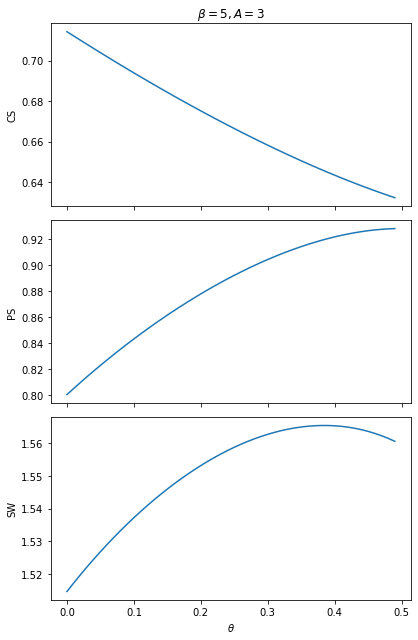

In [6]:
plot_surplus(β=5, A=3, θ_range=np.arange(0,0.5,0.01),surplus_func=surplus_b);

In [7]:
res=pd.DataFrame(columns=['β','(a-c)^2','θ','CS','PS','SW'])
betas=[0.2, 0.6, 1.0, 1.4, 1.8, 2.2]
for β in betas:
    for A in np.arange(np.ceil(13.5/β),100,1)[:5]:
        t=pd.DataFrame(surplus_u(β=β,A=A,θ_range=np.arange(0,0.5,0.001))).T
        t.columns=['CS','PS','SW']
        t['β']=β
        t['(a-c)^2']=A
        t['θ']=np.arange(0,0.5,0.001)
        res=res.append(t)

res.to_csv("table2.csv",index=False)